To train a file simply decide which type of VAE you wish to train.  The main options are a stard VAE (fully convolutional, annealing) or a Physicallu constrained VAE (Covariance constraint added to the loss function to improve reconstructions)

If you want to train the standard VAE

- train_fully conv.py

If you want to train the constrained VAE

- train_stats_constrained.py

If you want to train a baseline autoencoder see the autoencoder/ directory

Once you have selected which type of VAE you want to train, you simply need to pair it with a config file.  All config files can be found in the model_config/ directory.  Most of them will work but not all of them are good.  I reccomend using config 31 for the standard VAE and config 87 for the physically constrained VAE.  Much of the config file can be kept the same for now.  It specifies all the hyperparameters to the model including:

- number of layers
- layer width
- filter size
- layer type
- latent space compression
- number of training epochs
- learning rate

Most of these hyperparameters can be kept constant.  I would reccomend reducing the training epochs to something like 5 first to see if the script runs or not though.  Dependeding on where you put the preprocessed data you will need to change the paths for training data, test data, max scalar, and min scalar:

    "data": {
        "training_data_path": "/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_W_Training.npy",
        "test_data_path": "/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_W_Test.npy",
        "train_labels": "/fast/gmooers/Preprocessed_Data/Centered_50_50/Y_Train.npy",
        "test_labels": "/fast/gmooers/Preprocessed_Data/Centered_50_50/Improved_Y_Test.npy",
        "max_scalar": "/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Max_Scalar.npy",
        "min_scalar": "/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Min_Scalar.npy"
        
Ignore the label paths for now.

Now you are ready to train the model:

In [ ]:
conda activate "name of your GPU environment"

In [ ]:
python3 train_fully_conv.py --id 31

In [ ]:
python3 train_stats_constrained.py --id 87

When the training script completes it automatically saves the losses in each epoch under model_graphs/losses/.  This can be a quick test to see how your model did.

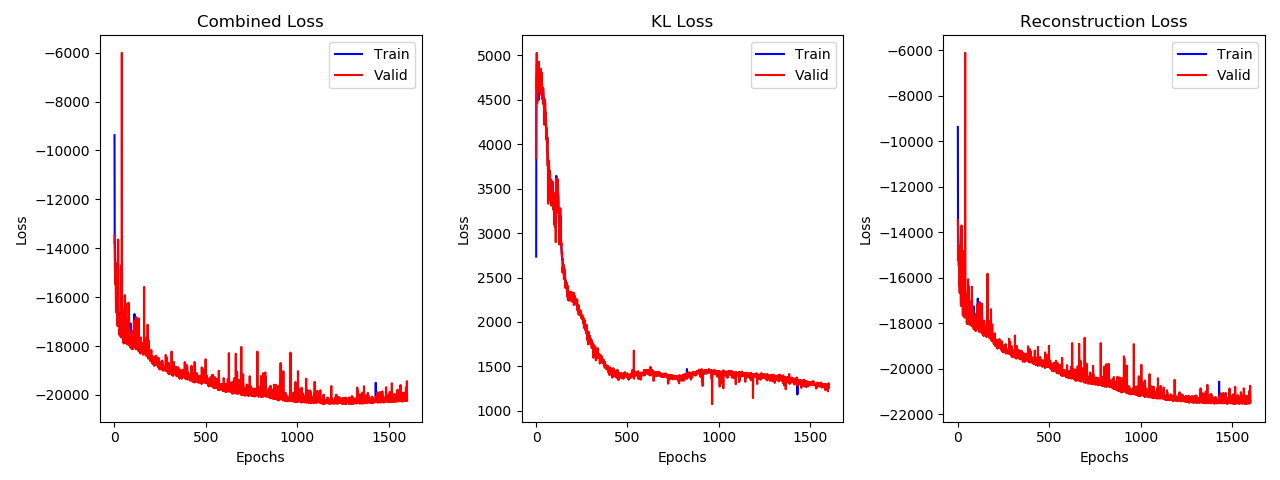

In [3]:
from IPython.display import Image
Image(filename='/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/losses/model_losses_31.png') 

Dr. Mandt had pointed out to me in the past that this should not be treated as the complete picture.  Nonetheless, I find that usually a good VAE (for representation learning) has

- a Reconstruction loss curve similar to that of a deterministic ML model that decreases over a couple hundred epochs to a point of stability
- a KL loss curve that initially increases greatly, than gradually decreases (but stays in the hundreds at a minimum)

To analyize your model, use the correspondion "sampling" script.  For the standard vae:

- sample_fully_conv_improved.py

For the constrained VAE

- sample_stats_constrained.py

For now, I would reccomend using 2 functions in the script for quickly checking 

Use the same "--id" syntax to pair the model to the correct hyperparameters.  But when in analysis mode, use the CPU environment:

In [ ]:
conda deactivate "name of your GPU environment"

In [ ]:
conda activate "name of your CPU Environment"

In [ ]:
python3 sample_fully_conv_improved.py --id 31 

It is designed a little archaically in that you want to comment in the function you are interested in running at the bottom:

    # get side by side plots of original vs. reconstructed
    # sample_reconstructions(vae, train_data, test_data, args.id, dataset_max, dataset_min)
    #reconstruct_targets(vae, test_data, [2, 15, 66 , 85, 94], args.id, dataset_max, dataset_min)
    #reconstruct_targets_paper(vae, test_data, [23506, 66 , 23746], args.id, dataset_max, dataset_min)
    #reconstruct_targets_paper(vae, test_data, [2, 15, 66 , 85, 94], args.id, dataset_max, dataset_min)
    #sample_latent_space(encoder_result.vae_encoder, train_data, test_data, args.id, dataset_min, dataset_max, test_labels, args.dataset_type)
    #sample_latent_space_var(encoder_result.vae_encoder, train_data, test_data, args.id, dataset_min, dataset_max, test_labels, args.dataset_type)
    latent_space_interpolation(vae, vae_decoder, encoder_result.vae_encoder, train_data, test_data, args.id, dataset_min, dataset_max, test_labels, args.dataset_type)
    #sample_frob_norm(vae, vae_decoder, encoder_result.vae_encoder, train_data, test_data, args.id, dataset_min, dataset_max, test_labels, args.dataset_type)
    #generate_samples(vae_decoder, dataset_min, dataset_max, model_config["encoder"]["latent_dim"], args.id)
    
    
The two I would reccomend you use to judge your VAE by are "reconstructs_targets_paper" which tests the reconstructions from the VAE.  The numbers in the list are just the numbers in the test dataset the VAE performs a reconstruction on.  Feel free to change them.

To analysize the latent space, comment in sample_latent_space_var(). A good latent space will be spread out and organized.